In [73]:
import sklearn

from sklearn import datasets
from sklearn import svm
from sklearn.preprocessing import scale
from sklearn import metrics
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


In [7]:
digits = datasets.load_digits()

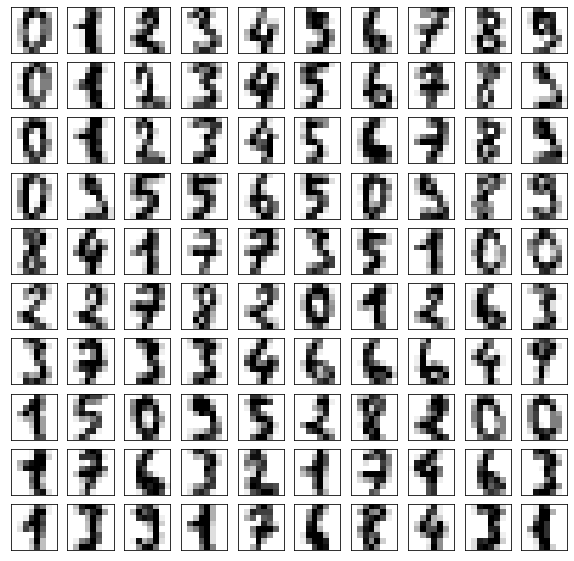

In [34]:
fig = plt.figure(figsize = (10,10))

for i in range(100):
    ax = fig.add_subplot(10, 10, i+1, xticks=[], yticks=[])
    plt.imshow(digits.images[i], cmap = plt.cm.binary, interpolation='nearest')

## Input data

We represent each 8x8 image as a 1 x 64 array of pixel values.
So, our $n = 1797$ images are a $n \times 64$ matrix.


In [74]:
digits.images[101]

array([[ 0.,  0.,  1., 12.,  5.,  0.,  0.,  0.],
       [ 0.,  0.,  9., 16., 14.,  3.,  0.,  0.],
       [ 0.,  2., 16., 14., 11., 13.,  0.,  0.],
       [ 0.,  2., 16., 10.,  0., 14.,  4.,  0.],
       [ 0.,  4., 16.,  0.,  0., 12.,  4.,  0.],
       [ 0.,  4., 16.,  3.,  0., 11., 10.,  0.],
       [ 0.,  0., 13., 12.,  8., 14.,  6.,  0.],
       [ 0.,  0.,  3., 10., 16., 12.,  1.,  0.]])

In [75]:
digits.data[101]

array([ 0.,  0.,  1., 12.,  5.,  0.,  0.,  0.,  0.,  0.,  9., 16., 14.,
        3.,  0.,  0.,  0.,  2., 16., 14., 11., 13.,  0.,  0.,  0.,  2.,
       16., 10.,  0., 14.,  4.,  0.,  0.,  4., 16.,  0.,  0., 12.,  4.,
        0.,  0.,  4., 16.,  3.,  0., 11., 10.,  0.,  0.,  0., 13., 12.,
        8., 14.,  6.,  0.,  0.,  0.,  3., 10., 16., 12.,  1.,  0.])

## test, training

We split our $n$ images into two sets. One set has has 75% of the observations, and the other has 25%.
We use the 75% as the "training" set.

So our test set is 25% of the data. For both the test and training sets, we have "inputs" and "targets".
We label the "inputs" by `X` below and the targets by `y`. E.g. `X_train`, and `y_train`.

In [80]:
X_train, X_test, y_train, y_test, images_train, images_test\
    = train_test_split(digits.data,
                       digits.target,
                       digits.images,
                       test_size = 0.25,
                       random_state = 1010)

## Support vector machine

The svm is a max margin linear classifier. It will find hyperplanes in the 64 dimensional space that divides the space. We use essentially default parameters. 

In [81]:
model = svm.SVC(gamma = 0.001, C=100.0, kernel = 'linear')

The following is how we fit the data.

In [82]:
model_fit = model.fit(X_train, y_train)

Now, we make predictions.

In [70]:
y_predicted = model.predict(X_test)

Now, we compare the predictions with the truth in a *confusion matrix*.

In [72]:
metrics.confusion_matrix(y_test, y_predicted)

array([[43,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 45,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 36,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 52,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  1,  0, 44,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 36,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 42,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2, 48]])